### <center> Antes e Depois do Dropout </center>
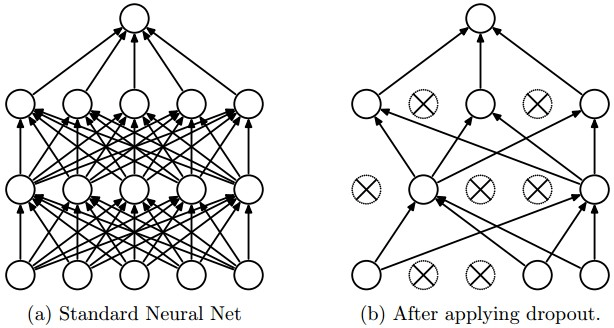

Dropout is a regularization technique for reducing overfitting. The technique temporarily drops units (__[artificial neurons](https://en.wikipedia.org/wiki/Artificial_neuron)__) from the network, along with all of those units' incoming and outgoing connections. Figure 1 illustrates how dropout works.

The tf.nn.dropout() function takes in two parameters:
1. __hidden_layer__: the tensor to which you would like to apply dropout
2. __keep_prob__: the probability of keeping (i.e. not dropping) any given unit

__keep_prob__ allows you to adjust the number of units to drop. In order to compensate for dropped units, tf.nn.dropout() multiplies all units that are kept (i.e. not dropped) by 1/keep_prob.

During training, a __good starting value for keep_prob is 0.5__

In [ ]:
# Quiz Solution
# Note: You can't run code in this tab
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

# Weights and biases
weights = [
    tf.Variable(hidden_layer_weights),
    tf.Variable(out_weights)]
biases = [
    tf.Variable(tf.zeros(3)),
    tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])

# TODO: Create Model with Dropout
keep_prob = tf.placeholder(tf.float32)
hidden_layer = tf.add(tf.matmul(features, weights[0]), biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

logits = tf.add(tf.matmul(hidden_layer, weights[1]), biases[1])

# TODO: Print logits from a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(logits, feed_dict={keep_prob: 0.5}))